# Renewable Energy Forecasting using Multiple Linear Regression

The major problem towards utilizing non-conventional energy is the fluctuation of energy reception from these sources which makes the integration of these sources difficult into the grid. Maining an equilibrium between energy supply and demand can be erratic and this situation calls for forecasting the amount of electricity generated from Non Conventional Sources.

# 1. Setting up Python Libraries

In this step, we will set up all the libraries of Python that we are going to be using. Libraries imported throughout this notebook and their significance is stated below:

- numpy: Numeber Python Library. Part of the SciPy package. Used as a container of multidimensional data. Integrates well with sklearn. README: https://numpy.org/

- matplotlib: Mathematical Plotting Library. Used in Python for 2D plotting (graphs and tables). README: https://matplotlib.org/

- pandas: Easy to use data structures and data analysis tools for the Python programming language. README: https://pandas.pydata.org/

- seaborn: More advanced statistical data visualization tool based on matplotlib. README: https://seaborn.pydata.org/

- sklearn: Simple and Efficient tools for predictive data analysis. Has support for many ML models inbuilt. README: https://scikit-learn.org/stable/ TUTORIAL: https://www.youtube.com/watch?v=0Lt9w-BxKFQ

- datetime: Basic module that supplies classes for manipulation of dates and times. README: https://docs.python.org/3/library/datetime.html

- math: Module provides access to the mathematical functions. README: https://docs.python.org/3/library/math.html

In [1]:
# Import Libraries. Libraries not imported here will be imported when they get used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The next line is just for Jupyter (inline IDE)
%matplotlib inline

In [2]:
# Set variables for matplotlib for asthetics and size of graphs
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

# 2. Importing the Data and Assumptions:

The data exists in a CSV file and has data of Solar Insolation and various factors from NASA (add sources here).

Data was acquired for the Location: Latitude  28.6759   Longitude 77.1132 which corresponds to our college.

We will be predicting Solar Insolation Incident on a Horizontal Surface (kW-hr/m^2/day) using the parameters Downward Thermal Infrared (Longwave) Radiative Flux (kW-hr/m^2/day), Specific Humidity at 2 Meters (kg kg-1) and Insolation Clearness Index (dimensionless). Data is arranged in chronological order.

We'll be using the read_csv() of Pandas to fetch our data into a multidimensional data frame df of numpy. Location of data needs to be changed based on where the Jupyter Notebook file is placed and where the actual CSV file is located.

In [3]:
# Loading Data
df = pd.read_csv('Insolation-Inputs.csv')

# In case CSV is in a different folder/file, you can provide the complete path instead in the command below.
#df = pd.read_csv('C:\Users\vishu\Desktop\PY\weather-and-aqi-v5.csv')

# Print first five rows of data frame to visualize the data.
print(df.head())

        LAT       LON  YEAR  MO  DY      QV2M    KT   DTI   SII
0  28.67591  77.11321  1998   1   1  0.003275  0.56  6.98  3.26
1  28.67591  77.11321  1998   1   2  0.002891  0.59  6.34  3.45
2  28.67591  77.11321  1998   1   3  0.002866  0.61  6.75  3.59
3  28.67591  77.11321  1998   1   4  0.003280  0.58  6.90  3.42
4  28.67591  77.11321  1998   1   5  0.003660  0.60  7.05  3.54


Display the list of Columns in the file as there may be too many columns and we may not need all of them.

In [4]:
# Show the list of all columns in the actual dataset
print(df.columns)

Index(['LAT', 'LON', 'YEAR', 'MO', 'DY', 'QV2M', 'KT', 'DTI', 'SII'], dtype='object')


In [5]:
# See the list of data types for each column so that we can refine our data based on it
print(df.dtypes)

LAT     float64
LON     float64
YEAR      int64
MO        int64
DY        int64
QV2M    float64
KT      float64
DTI     float64
SII     float64
dtype: object


# 3. Clean up the columns

Our Model predicts the average insolation per day in the future based on the factors affecting insolation like
- Downward Thermal Infrared Radiative Flux
- Specific Humidity
- Isolation Clearness Index

So, out of the complete data, we need to keep data from only these columns and other columns containing the location can be dropped. The remaining fields are either 1) Date Fields, 2) Weather and Atmospheric data that represents our factors, 3) Solar Insolation data as only these features are useful for our prediction. The rest will be removed (dropped)

In [6]:
#drop unneeded features
df = df.drop(['LAT', 'LON'], axis=1)

print(df.columns)

Index(['YEAR', 'MO', 'DY', 'QV2M', 'KT', 'DTI', 'SII'], dtype='object')


Let us now try to visualize the data based on Year

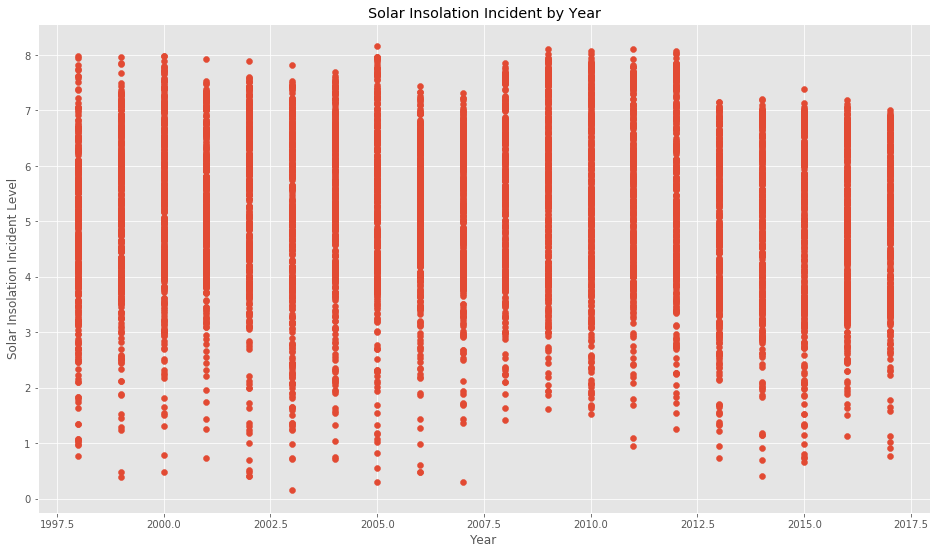

In [7]:
x = df['YEAR']
y = df['SII']
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Solar Insolation Incident Level')
plt.title('Solar Insolation Incident by Year')
plt.show()

Sorting by year just lists items by year. We need to create items by date.

### Organizing by date

We can use year, month and day columns to create the date.

In [8]:
df['Date'] = pd.to_datetime(dict(year=df.YEAR, month=df.MO, day=df.DY))
print(df.head())

   YEAR  MO  DY      QV2M    KT   DTI   SII       Date
0  1998   1   1  0.003275  0.56  6.98  3.26 1998-01-01
1  1998   1   2  0.002891  0.59  6.34  3.45 1998-01-02
2  1998   1   3  0.002866  0.61  6.75  3.59 1998-01-03
3  1998   1   4  0.003280  0.58  6.90  3.42 1998-01-04
4  1998   1   5  0.003660  0.60  7.05  3.54 1998-01-05


Now, there is no need for YEAR, MO and DY columns and hence we can drop them as well.

In [9]:
#drop unneeded features
df = df.drop(['YEAR', 'MO', 'DY'], axis=1)

print(df.columns)

Index(['QV2M', 'KT', 'DTI', 'SII', 'Date'], dtype='object')


We need to separate our dataframe df into Inputs (X) and Outputs (y). We can do that easily with drop and slicing.

In [10]:
# Separate independent variable data (X) from dependent variable data (Y)
y = df['SII']
X = df.drop(['SII','Date'], axis=1)

print(f'Inputs: {X}')
print(f'Outputs: {y}')
print(df)

Inputs:           QV2M    KT   DTI
0     0.003275  0.56  6.98
1     0.002891  0.59  6.34
2     0.002866  0.61  6.75
3     0.003280  0.58  6.90
4     0.003660  0.60  7.05
...        ...   ...   ...
7293  0.003568  0.60  6.71
7294  0.003605  0.59  6.86
7295  0.004107  0.59  7.09
7296  0.003375  0.58  6.94
7297  0.002991  0.48  7.43

[7298 rows x 3 columns]
Outputs: 0       3.26
1       3.45
2       3.59
3       3.42
4       3.54
        ... 
7293    3.42
7294    3.38
7295    3.37
7296    3.32
7297    2.80
Name: SII, Length: 7298, dtype: float64
          QV2M    KT   DTI   SII       Date
0     0.003275  0.56  6.98  3.26 1998-01-01
1     0.002891  0.59  6.34  3.45 1998-01-02
2     0.002866  0.61  6.75  3.59 1998-01-03
3     0.003280  0.58  6.90  3.42 1998-01-04
4     0.003660  0.60  7.05  3.54 1998-01-05
...        ...   ...   ...   ...        ...
7293  0.003568  0.60  6.71  3.42 2017-12-26
7294  0.003605  0.59  6.86  3.38 2017-12-27
7295  0.004107  0.59  7.09  3.37 2017-12-28
7296  0.003

# Visualization of Data

We can visualize the data dependency on one another using a Correlation Matrix of Seaborn.

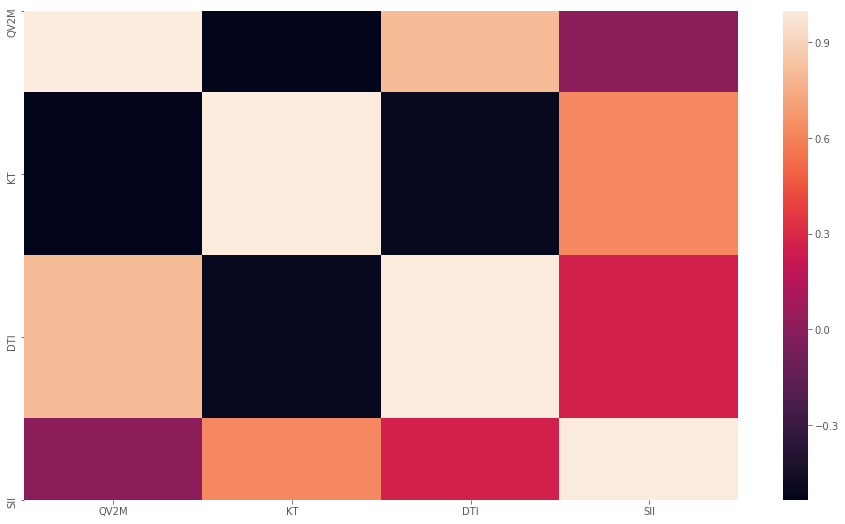

In [11]:
# Data visualization using a Correlation Matrix
sns.heatmap(df.corr())

From above heatmap, we can determine that SII is dependent the most on KT (Insolation Clearness Index), then on DTI (Downward Thermal Infrared Radiative Flux) and least on QV2M (Specific Humidity).

We can also plot the solar insolation over lenth of time.

In [12]:
def time_series(start, end):
    time_series_df = df[['Date', 'SII']][(df['Date'] >= start) & (df['Date'] <= end)]
    x1 = time_series_df.Date
    y1 = time_series_df.SII
    plt.plot(x1,y1)
    plt.xlabel('Time')
    plt.ylabel('Solar Insolation Value')
    plt.title('Solar Insolation Incident Time Series')
    return plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


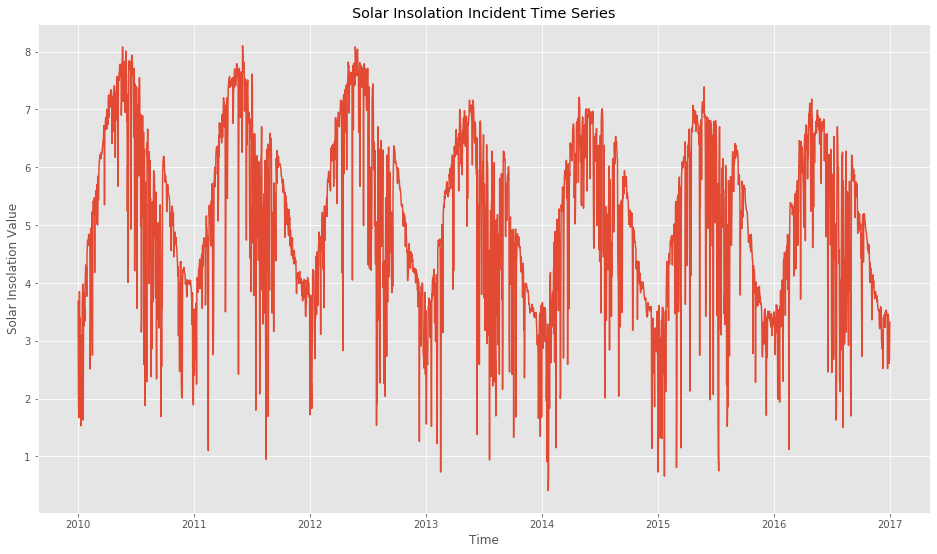

In [13]:
time_series('2010','2017')

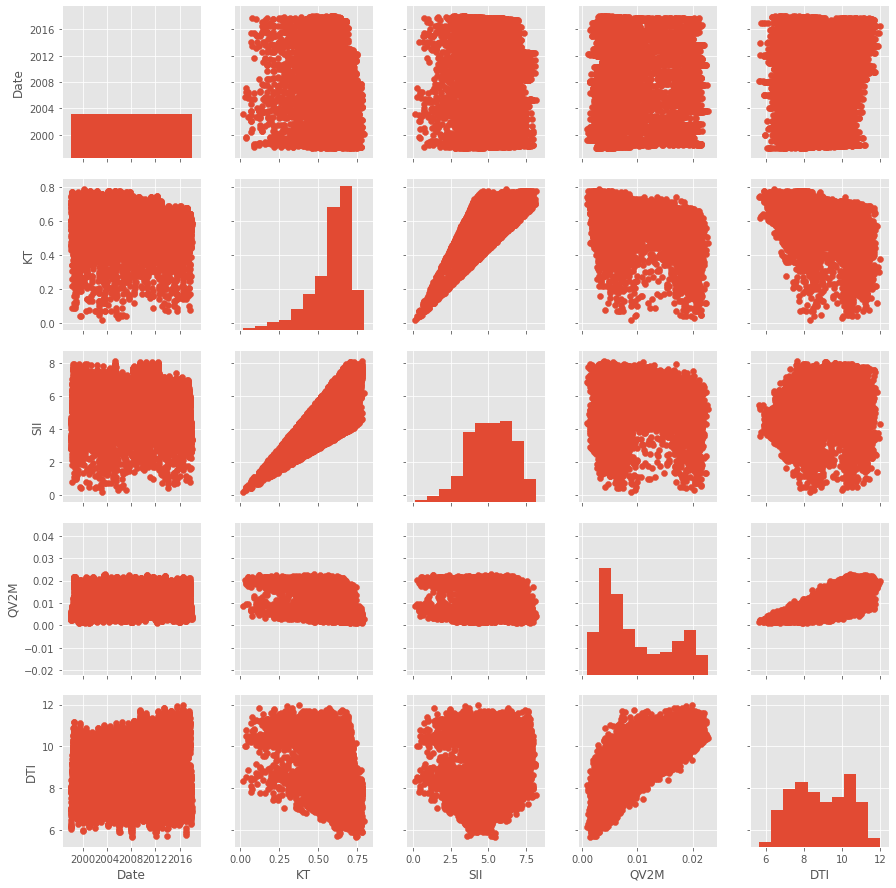

In [14]:
g = sns.PairGrid(df, vars=["Date", "KT", "SII", "QV2M", "DTI"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# Preprocessing Data using SKLEARN preprocessor.

We can using the preprocessor to separate the labels that computer will not understand and place values in its place that computers will understand.


In [15]:
# Encoding categorical data if necessary
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder = LabelEncoder()
# X[:,3] = labelencoder.fit_transform(X[:,3])
# onehotencoder = OneHotEncoder(categorical_features = [3])
# X = onehotencoder.fit_transform(X).toarray()

#Avoiding Dummy variable trap during Encoding
# X = X[:,1:]

# Split into Training and Test Data

We will split the data into training and test data. Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. X and y (inputs and outputs) have already been created previously.

sklearn's train_test_split allows us to randomly split the data. Here we are keeping 25% of the data for testing and the rest of the data for training.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [17]:
# Check number of rows in training data
X_train.shape, y_train.shape

((5473, 3), (5473,))

In [18]:
# Check number of rows in testing data
X_test.shape, y_test.shape

((1825, 3), (1825,))

# Implement ML Algorithms

We are going to implement various algorithms here:
- Linear Regression
- Neural Network Regression
- Random Forest Regression
- Lasso
- Elastic Net
- Extra Trees Regression

### Linear Regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

0.8551824209821941
Coefficients: 
 [-59.85153648  10.88873762   0.95947107]
Root mean squared error: 0.57
Mean absolute error: 0.46
R-squared: 0.86


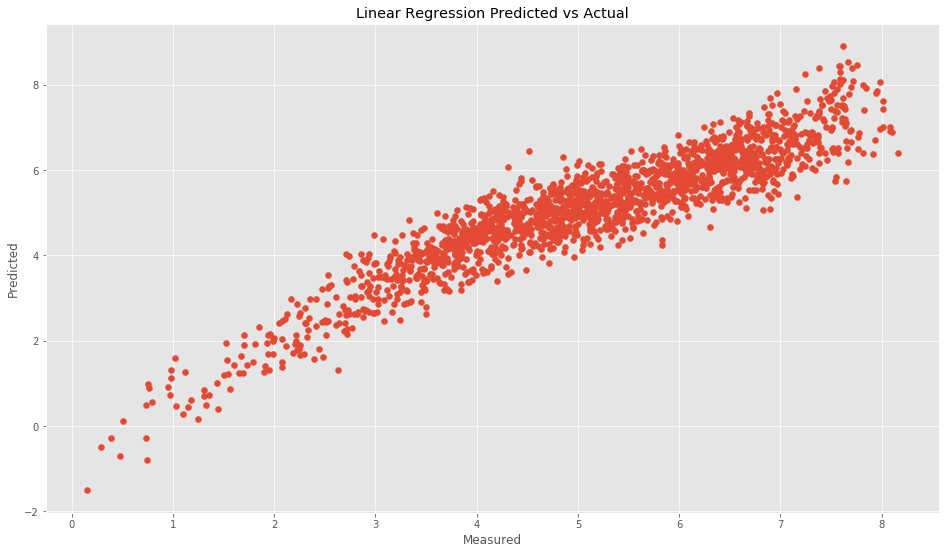

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
lin_pred = regr.predict(X_test)

linear_regression_score = regr.score(X_test, y_test)
print(linear_regression_score)

from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

### Neural Network Regression

If you need a more complex model, applying a neural network to the problem can provide much more prediction power compared to a traditional regression.

0.8628359916419439
Root mean squared error: 0.56
Mean absolute error: 0.45
R-squared: 0.86


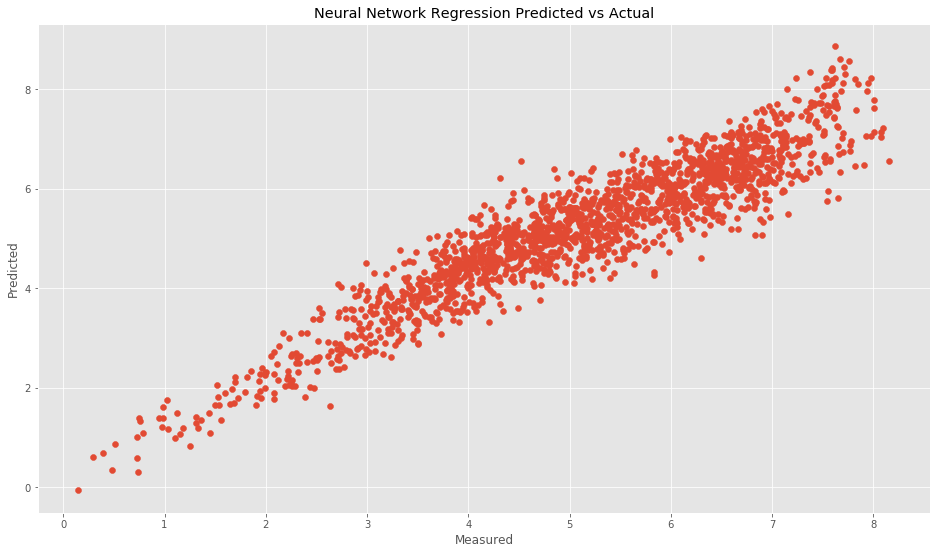

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

# Train the model using the training sets
mlp.fit(X_train, y_train)

# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
print(neural_network_regression_score)

# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

### Random Forest Regression

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

0.8896336880916893
Root mean squared error: 0.50
Mean absolute error: 0.35
R-squared: 0.89
Index(['QV2M', 'KT', 'DTI'], dtype='object')


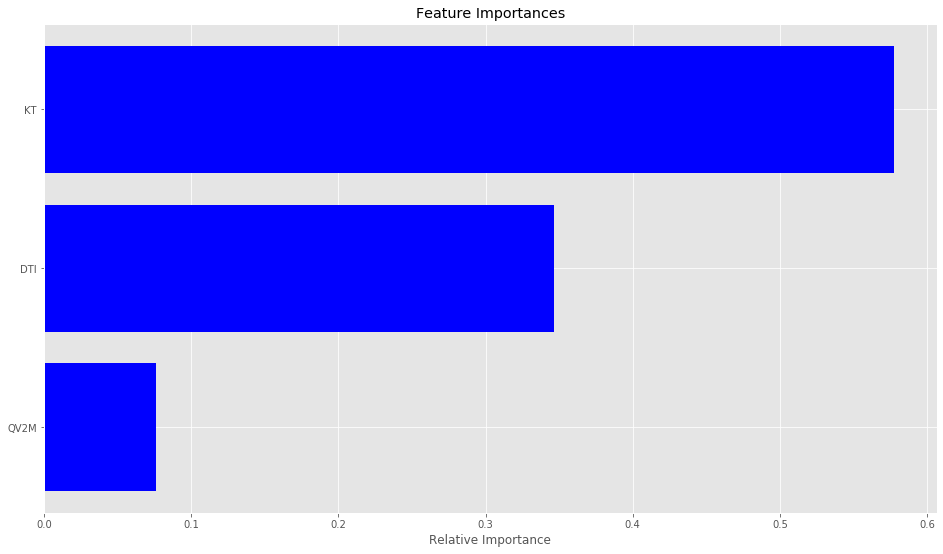

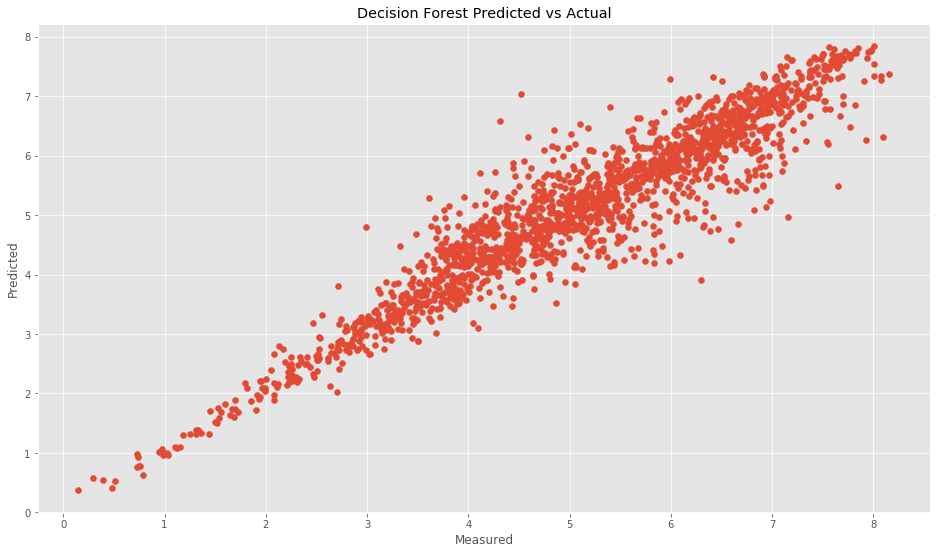

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=0)

# Train the model using the training sets
regr_rf.fit(X_train, y_train)

# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
print(decision_forest_score)

# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

print(X.columns)

features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

### Lasso

Least Absolute Shrinkage and Selection Operator (LASSO) regression shrinks the regression coefficients to solve the multicollinearity problem. However, Lasso regression shrinks the absolute values, not the least squares, meaning some of the coefficients can become zero. This leads to “feature selection”—if a group of dependent variables are highly correlated, it picks one and shrinks the others to zero.

-5.661070450591055e-05
Root mean squared error: 1.50


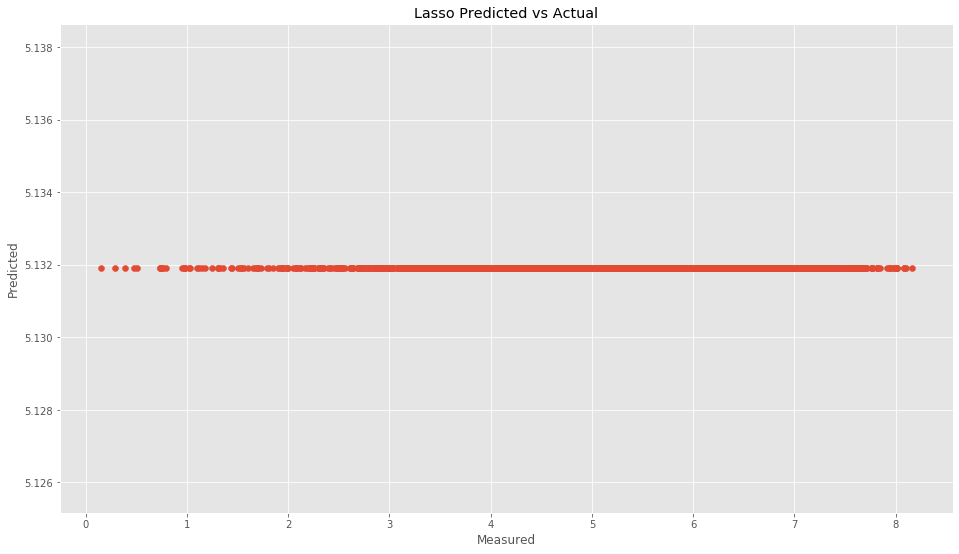

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

# Score the model
lasso_score = lasso.score(X_test, y_test)
print(lasso_score)

# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

### ElasticNet

ElasticNet combines Ridge and Lasso regression, and is trained successively with L1 and L2 regularization, thus trading-off between the two techniques. The advantage is that ElasticNet gains the stability of Ridge regression while allowing feature selection like Lasso. Whereas Lasso will pick only one variable of a group of correlated variables, ElasticNet encourages a group effect and may pick more than one correlated variables.

In [23]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

elasticnet.fit(X_train, y_train)

elasticnet_score = elasticnet.score(X_test, y_test)
print(elasticnet_score)

elasticnet_pred = elasticnet.predict(X_test)

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

0.011406435454904051
Root mean squared error: 1.49


### Extra Trees Regression

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

0.8811402198559602
Root mean squared error: 0.52


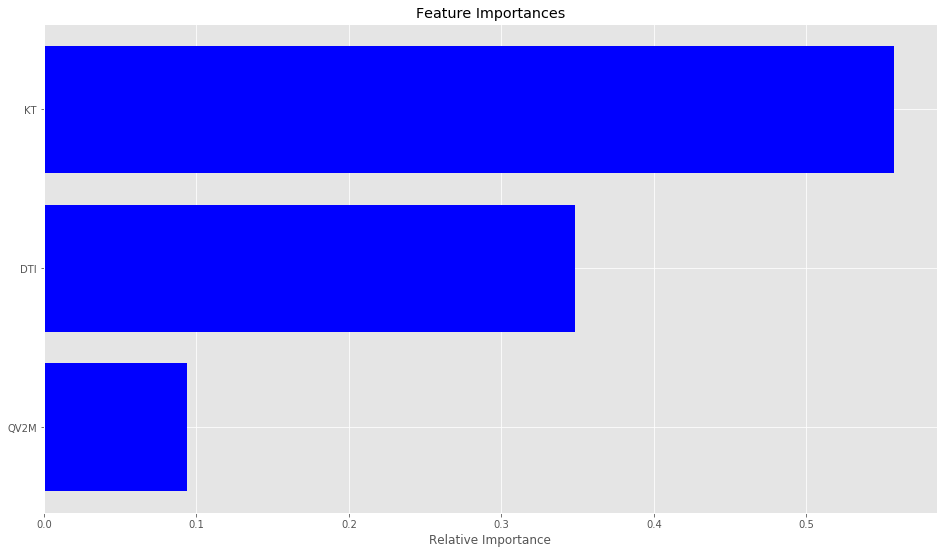

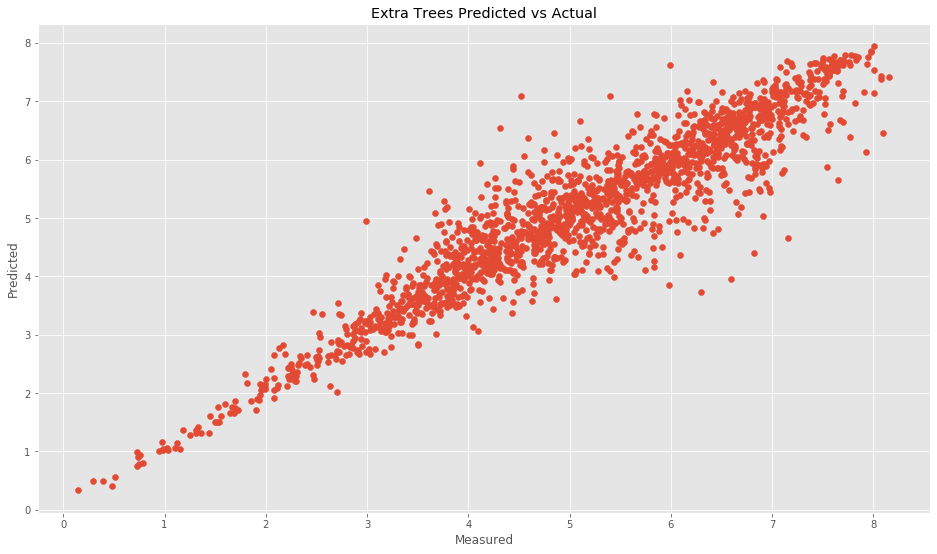

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=0)

extra_tree.fit(X_train, y_train)

extratree_score = extra_tree.score(X_test, y_test)
print(extratree_score)

extratree_pred = extra_tree.predict(X_test)

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

# Evaluate Models

In [26]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Random Forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Random Forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Scores:
Linear regression score:  0.8551824209821941
Neural network regression score:  0.8628359916419439
Lasso regression score:  -5.661070450591055e-05
ElasticNet regression score:  0.011406435454904051
Random Forest score:  0.8896336880916893
Extra Trees score:  0.8811402198559602


RMSE:
Linear regression RMSE: 0.57
Neural network RMSE: 0.56
Lasso RMSE: 1.50
ElasticNet RMSE: 1.49
Random Forest RMSE: 0.50
Extra Trees RMSE: 0.52
